# Food Truck Business Profitability Assessment

This file is mainly used to detect what are the affecting factors for food truck business & data visualization 

In [1]:
# import all libraries 
import pandas as pd
from pandas import Series

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import statsmodels.api as sm

import pylab 
import scipy.stats as stats

from sklearn import preprocessing

C:\Users\Claire\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("Food_truck.csv",index_col='Date')
data.columns = ['Quantity', 'City', 'Precipitation', 'Temperature', 'Festival', 'Price','Weekday','London','Waterloo','Toronto']
data['Price']=data['Price'].map(lambda x: int(x[2]) if x[2] != '1' else int(x[2:4]))
data['Precipitation']=data['Precipitation'].map(lambda x: int(x[0:x.find("%")]))

data.head()

,Quantity,City,Precipitation,Temperature,Festival,Price,Weekday,London,Waterloo,Toronto
Date,,,,,,,,,,
12/1/2013,76,Hamilton,18,-5,0,8,1,0,0,0
12/2/2013,53,Toronto,73,3,0,10,1,0,0,1
12/3/2013,73,London,47,0,0,8,1,1,0,0
12/4/2013,70,London,40,-1,0,9,1,1,0,0
12/5/2013,7,Toronto,89,0,0,10,0,0,0,1


In [3]:
data.describe()

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,London,Waterloo,Toronto
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,48.378082,52.109589,9.073973,0.084932,7.972603,0.572603,0.265753,0.200000,0.257534
std,26.597934,26.071205,9.832806,0.279162,1.437074,0.495380,0.442340,0.400549,0.437876
min,0.000000,0.000000,-10.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,33.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,53.000000,8.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
75%,65.000000,73.000000,18.000000,0.000000,9.000000,1.000000,1.000000,0.000000,1.000000
max,135.000000,100.000000,27.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# quick check of data quality 
data.isnull().sum()

Quantity         0
City             0
Precipitation    0
Temperature      0
Festival         0
Price            0
Weekday          0
London           0
Waterloo         0
Toronto          0
dtype: int64

### Quick Financial Analysis    - Profitability by CITY

Assumptions: 

    Assume each burger contains one beef patty, two(???? Make it dynamic) buns and one portion of topping; 
    Assume no left over material cost; 
    Assume "Temperature" and "% chance of parcipitation" parameter will not change across cities; 
    ASSUME travel time does not occur opportunity cost; 
    
    
    
Optimization assumption:
    
    Assume price should be integer; 

##### Approach - 

    Separate data by city; 
    
    For each city, fixed cost per day would be the same (from Parking and distance (GAS)); 
                   variable cost would depend on sales quantity; 
                   TOTAL COST PER DAY = fixed cost + [variable cost] / unit * [unit]
                   
                   Revenue PER DAY = [Price for each day] * [unit]
                   
                   DAILY PROFIT = Revenue PER DAY - TOTAL COST PER DAY
                   
     TOTAL PROFIT = sum(DAILY PROFIT)

###### Background information 

    Fixed cost when you pick location/city include: Gas, parking;
    Variable cost include: price of burger 

Fixed cost each day - 

    For Toronto: 25 + 70/5*1.039 = 39.546 = 40
    For Hamilton:  15 + 0/5*1.039 = 15
    For Waterloo: 10 + 72/5*1.039 = 24.961599999999997 = 25
    For London: 0 + 130/5*1.039 = 27.014 = 27


###### Some interesting side conclusion can be derived from analysis: 

    Days of festival is low (London: 7; Waterloo: 10; Toronto: 6; Hamilto: 8)
    Around 50% days are weekdays for each city; 
    

###### London

In [5]:
# London - 97 days out of 365 days [ 27% ]

London_data = data.loc[data['London'] == 1]
London_data = London_data [['Quantity','Precipitation','Temperature','Festival','Price','Weekday']]

# London_data.reset_index(drop=True)
London_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday
Date,,,,,,
12/3/2013,73,47,0,0,8,1
12/4/2013,70,40,-1,0,9,1


In [6]:
London_data['DAILY_PROFIT'] =  London_data.Quantity * London_data.Price - (0 + 130/5*1.039 + London_data.Quantity * 2.3)
London_data.head(2)

# Quantity * price - (parking + gas + Quantity * material_cost)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
Date,,,,,,,
12/3/2013,73,47,0,0,8,1,389.086
12/4/2013,70,40,-1,0,9,1,441.986


In [7]:
# Total profit 

print('Total profit for London is $', round(sum(London_data['DAILY_PROFIT']),1)) 

print('Avgerage daily profit for London is $', round(sum(London_data['DAILY_PROFIT'])/len(London_data['DAILY_PROFIT']),1)) 

print('Median daily profit for London is $', statistics.median(London_data['DAILY_PROFIT'])) 

Total profit for London is $ 29359.5
Avgerage daily profit for London is $ 302.7
Median daily profit for London is $ 257.886


In [8]:
# count
print('Count of days in London:', len(London_data['DAILY_PROFIT'])) 
print('Percentage of days in London:', round(len(London_data['DAILY_PROFIT'])/365*100,1),'%') 

Count of days in London: 97
Percentage of days in London: 26.6 %


In [9]:
London_data.describe()

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,58.938144,42.762887,8.505155,0.072165,7.886598,0.556701,302.675691
std,21.471791,21.835929,10.448409,0.260105,1.442483,0.499355,157.132437
min,18.000000,0.000000,-10.000000,0.000000,6.000000,0.000000,39.586000
25%,44.000000,28.000000,0.000000,0.000000,7.000000,0.000000,198.686000
50%,57.000000,45.000000,8.000000,0.000000,8.000000,1.000000,257.886000
75%,73.000000,59.000000,19.000000,0.000000,9.000000,1.000000,400.486000
max,130.000000,80.000000,27.000000,1.000000,10.000000,1.000000,843.986000


In [67]:
London_data.loc[London_data['DAILY_PROFIT'].idxmax()]

Quantity         130.000
Precipitation     39.000
Temperature       17.000
Festival           1.000
Price              9.000
Weekday            1.000
DAILY_PROFIT     843.986
Elasticity        -6.250
Name: 6/10/2014, dtype: float64

In [10]:
London_data['Elasticity'] = np.nan

for i in range(1,len(London_data)):
    if London_data['Price'][i] != London_data['Price'][i-1]:
        London_data['Elasticity'][i] = (London_data['Quantity'][i] - London_data['Quantity'][i-1])/London_data['Quantity'][i-1] /((London_data['Price'][i] - London_data['Price'][i-1])/London_data['Price'][i-1])
        
London_data['Elasticity'].mean()

C:\Users\Claire\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-0.39777276501156017

###### Waterloo

In [11]:
# Waterloo
Waterloo_data = data.loc[data['Waterloo'] == 1]
Waterloo_data = Waterloo_data [['Quantity','Precipitation','Temperature','Festival','Price','Weekday']]

# Waterloo_data.reset_index(drop=True)
Waterloo_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday
Date,,,,,,
12/7/2013,38,62,-3,0,8,0
12/18/2013,54,63,-5,0,8,1


In [12]:
Waterloo_data['DAILY_PROFIT'] =  Waterloo_data.Quantity * Waterloo_data.Price - (10 + 72/5*1.039 + Waterloo_data.Quantity * 2.54)
Waterloo_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
Date,,,,,,,
12/7/2013,38,62,-3,0,8,0,182.5184
12/18/2013,54,63,-5,0,8,1,269.8784


In [13]:
# Total profit

print('Total profit for Waterloo is $', round(sum(Waterloo_data['DAILY_PROFIT']),1)) 

print('Avgerage daily profit for Waterloo is $', round(sum(Waterloo_data['DAILY_PROFIT'])/len(Waterloo_data['DAILY_PROFIT']),1))

print('Median daily profit for Waterloo is $', statistics.median(Waterloo_data['DAILY_PROFIT'])) 

Total profit for Waterloo is $ 10612.4
Avgerage daily profit for Waterloo is $ 145.4
Median daily profit for Waterloo is $ 108.8384


In [14]:
# count
print('Count of days in Waterloo:', len(Waterloo_data['DAILY_PROFIT'])) 
print('Percentage of days in Waterloo:', round(len(Waterloo_data['DAILY_PROFIT'])/365*100,1),'%') 

Count of days in Waterloo: 73
Percentage of days in Waterloo: 20.0 %


In [15]:
Waterloo_data.describe()

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,32.684932,51.712329,10.000000,0.136986,8.136986,0.534247,145.374838
std,26.834822,27.923745,9.556847,0.346212,1.502914,0.502278,136.210555
min,0.000000,0.000000,-7.000000,0.000000,6.000000,0.000000,-24.961600
25%,13.000000,30.000000,0.000000,0.000000,7.000000,0.000000,40.778400
50%,28.000000,54.000000,9.000000,0.000000,8.000000,1.000000,108.838400
75%,45.000000,68.000000,18.000000,0.000000,10.000000,1.000000,206.958400
max,135.000000,100.000000,26.000000,1.000000,10.000000,1.000000,602.938400


In [70]:
Waterloo_data.loc[Waterloo_data['DAILY_PROFIT'].idxmax()]

Quantity         115.0000
Precipitation     54.0000
Temperature       23.0000
Festival           1.0000
Price              8.0000
Weekday            1.0000
DAILY_PROFIT     602.9384
Elasticity         1.0500
Name: 6/1/2014, dtype: float64

In [16]:
Waterloo_data['Elasticity'] = np.nan

for i in range(1,len(Waterloo_data)):
    if Waterloo_data['Price'][i] != Waterloo_data['Price'][i-1]:
        Waterloo_data['Elasticity'][i] = (Waterloo_data['Quantity'][i] - Waterloo_data['Quantity'][i-1])/Waterloo_data['Quantity'][i-1] /((Waterloo_data['Price'][i] - Waterloo_data['Price'][i-1])/Waterloo_data['Price'][i-1])
        
Waterloo_data['Elasticity'].mean()

C:\Users\Claire\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-6.4696452276737455

##### Toronto

In [17]:
# Toronto

Toronto_data = data.loc[data['Toronto'] == 1]
Toronto_data = Toronto_data [['Quantity','Precipitation','Temperature','Festival','Price','Weekday']]

# Toronto_data.reset_index(drop=True)
Toronto_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday
Date,,,,,,
12/2/2013,53,73,3,0,10,1
12/5/2013,7,89,0,0,10,0


In [18]:
Toronto_data['DAILY_PROFIT'] =  Toronto_data.Quantity * Toronto_data.Price - (25 + 70/5*1.039 + Toronto_data.Quantity * 4.6)
Toronto_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
Date,,,,,,,
12/2/2013,53,73,3,0,10,1,246.654
12/5/2013,7,89,0,0,10,0,-1.746


In [19]:
# Total profit

print('Total profit for Toronto is $', round(sum(Toronto_data['DAILY_PROFIT']),1)) 

print('Avgerage daily profit for Toronto is $', round(sum(Toronto_data['DAILY_PROFIT'])/len(Toronto_data['DAILY_PROFIT']),1)) 

print('Median daily profit for Toronto is $', statistics.median(Toronto_data['DAILY_PROFIT'])) 

Total profit for Toronto is $ 13812.7
Avgerage daily profit for Toronto is $ 146.9
Median daily profit for Toronto is $ 139.554


In [20]:
# count
print('Count of days in Toronto:', len(Toronto_data['DAILY_PROFIT'])) 
print('Percentage of days in Toronto:', round(len(Toronto_data['DAILY_PROFIT'])/365*100,1),'%') 

Count of days in Toronto: 94
Percentage of days in Toronto: 25.8 %


In [21]:
Toronto_data.describe()

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
count,94.000000,94.000000,94.000000,94.00000,94.000000,94.000000,94.000000
mean,58.989362,60.638298,9.670213,0.06383,7.904255,0.648936,146.943362
std,22.664687,22.718876,9.444106,0.24576,1.407118,0.479862,97.487431
min,7.000000,20.000000,-9.000000,0.00000,6.000000,0.000000,-25.546000
25%,45.000000,45.000000,2.000000,0.00000,7.000000,0.000000,75.354000
50%,55.000000,62.500000,8.500000,0.00000,8.000000,1.000000,139.554000
75%,74.500000,78.000000,17.750000,0.00000,9.000000,1.000000,201.504000
max,130.000000,99.000000,27.000000,1.00000,10.000000,1.000000,532.454000


In [71]:
Toronto_data.loc[Toronto_data['DAILY_PROFIT'].idxmax()]

Quantity         130.000000
Precipitation     27.000000
Temperature       27.000000
Festival           1.000000
Price              9.000000
Weekday            1.000000
DAILY_PROFIT     532.454000
Elasticity         6.611111
Name: 7/6/2014, dtype: float64

In [22]:
Toronto_data.head(10)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
Date,,,,,,,
12/2/2013,53,73,3,0,10,1,246.654
12/5/2013,7,89,0,0,10,0,-1.746
12/17/2013,82,24,2,0,6,1,75.254
12/22/2013,59,61,-1,0,8,1,161.054
12/24/2013,82,33,-1,0,7,1,157.254
12/26/2013,76,27,-1,0,8,0,218.854
12/27/2013,45,59,3,0,9,0,158.454
12/29/2013,87,78,-4,0,7,1,169.254
1/4/2014,23,90,0,0,9,0,61.654


In [23]:
Toronto_data['Elasticity'] = np.nan

for i in range(1,len(Toronto_data)):
    if Toronto_data['Price'][i] != Toronto_data['Price'][i-1]:
        Toronto_data['Elasticity'][i] = (Toronto_data['Quantity'][i] - Toronto_data['Quantity'][i-1])/Toronto_data['Quantity'][i-1] /((Toronto_data['Price'][i] - Toronto_data['Price'][i-1])/Toronto_data['Price'][i-1])
        
Toronto_data['Elasticity'].mean()

C:\Users\Claire\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-0.8423343134526085

###### Hamilton

In [24]:
# Hamilton
Hamilton_data = data.loc[data['Toronto'] + data['Waterloo'] + data['London'] == 0]
Hamilton_data = Hamilton_data [['Quantity','Precipitation','Temperature','Festival','Price','Weekday']]

# Hamilton_data.reset_index(drop=True)
Hamilton_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday
Date,,,,,,
12/1/2013,76,18,-5,0,8,1
12/8/2013,8,85,2,0,10,1


In [25]:
Hamilton_data['DAILY_PROFIT'] =  Hamilton_data.Quantity * Hamilton_data.Price - (15 + 0/5*1.039 + Hamilton_data.Quantity * 3.92)

Hamilton_data['DAILY_PROFIT'] = Hamilton_data['DAILY_PROFIT'].astype(int)

Hamilton_data.head(2)

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
Date,,,,,,,
12/1/2013,76,18,-5,0,8,1,295
12/8/2013,8,85,2,0,10,1,33


In [26]:
# Total profit

print('Total profit for Hamilton is $', round(sum(Hamilton_data['DAILY_PROFIT']),1)) 

print('Avgerage daily profit for Hamilton is $', round(sum(Hamilton_data['DAILY_PROFIT'])/len(Hamilton_data['DAILY_PROFIT']),1))

print('Median daily profit for Hamilton is $', statistics.median(Hamilton_data['DAILY_PROFIT'])) 

Total profit for Hamilton is $ 14672
Avgerage daily profit for Hamilton is $ 145.3
Median daily profit for Hamilton is $ 112


In [27]:
# count
print('Count of days in Hamilton:', len(Hamilton_data['DAILY_PROFIT'])) 
print('Percentage of days in Hamilton:', round(len(Hamilton_data['DAILY_PROFIT'])/365*100,1),'%') 

Count of days in Hamilton: 101
Percentage of days in Hamilton: 27.7 %


In [28]:
Hamilton_data.describe()

,Quantity,Precipitation,Temperature,Festival,Price,Weekday,DAILY_PROFIT
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,39.702970,53.435644,8.396040,0.079208,8.000000,0.544554,145.267327
std,25.816872,28.635089,9.832679,0.271410,1.421267,0.500495,131.001289
min,1.000000,0.000000,-10.000000,0.000000,6.000000,0.000000,-10.000000
25%,19.000000,32.000000,0.000000,0.000000,7.000000,0.000000,51.000000
50%,38.000000,59.000000,8.000000,0.000000,8.000000,1.000000,112.000000
75%,55.000000,77.000000,17.000000,0.000000,9.000000,1.000000,191.000000
max,125.000000,100.000000,27.000000,1.000000,10.000000,1.000000,594.000000


In [72]:
Hamilton_data.loc[Hamilton_data['DAILY_PROFIT'].idxmax()]

Quantity         120.0
Precipitation     52.0
Temperature       17.0
Festival           1.0
Price              9.0
Weekday            0.0
DAILY_PROFIT     594.0
Elasticity        30.4
Name: 6/21/2014, dtype: float64

In [29]:
Hamilton_data['Elasticity'] = np.nan

for i in range(1,len(Hamilton_data)):
    if Hamilton_data['Price'][i] != Hamilton_data['Price'][i-1]:
        Hamilton_data['Elasticity'][i] = (Hamilton_data['Quantity'][i] - Hamilton_data['Quantity'][i-1])/Hamilton_data['Quantity'][i-1] /((Hamilton_data['Price'][i] - Hamilton_data['Price'][i-1])/Hamilton_data['Price'][i-1])
        
Hamilton_data['Elasticity'].mean()

C:\Users\Claire\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-3.051158006576925

# Regression

Reference: http://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/

Assumptions:

    Multiple linear regression requires the relationship between the independent and dependent variables to be linear;  [Tool: scatterplots]
    
    Multiple linear regression analysis requires that the errors between observed and predicted values (i.e., the residuals of the regression) should be normally distributed;   [Tool: a histogram or a Q-Q-Plot]
    
    Multiple linear regression assumes that there is no multicollinearity in the data;    [Tool: Variance Inflation Factor (VIF) ]
    
    Homoscedasticity;         [Tool: A scatterplot of residuals versus predicted values]
    
    
    
statistically significant - P < 0.05


        -----------------------------------------------------------------------------------------------



Reference: http://scikit-learn.org/stable/modules/preprocessing.html 



    Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

    In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

    For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

    The function scale provides a quick and easy way to perform this operation on a single array-like dataset.

In [30]:
# Transformation & Normalization - X values  [Precipitation, Temperature, Price]

X = data[["Precipitation",'Temperature','Festival','Price','Weekday','London','Waterloo','Toronto']]
X_scaled = preprocessing.scale(X)

X_scaled = pd.DataFrame(X_scaled, columns=["Precipitation",'Temperature','Festival','Price','Weekday','London','Waterloo','Toronto'])
X_scaled.head()

,Precipitation,Temperature,Festival,Price,Weekday,London,Waterloo,Toronto
0,-1.310120,-1.433293,-0.304655,0.019091,0.863951,-0.601615,-0.5,-0.588951
1,0.802383,-0.618573,-0.304655,1.412718,0.863951,-0.601615,-0.5,1.697934
2,-0.196255,-0.924093,-0.304655,0.019091,0.863951,1.662193,-0.5,-0.588951
3,-0.465119,-1.025933,-0.304655,0.715904,0.863951,1.662193,-0.5,-0.588951
4,1.416929,-0.924093,-0.304655,1.412718,-1.157473,-0.601615,-0.5,1.697934


In [31]:
X = sm.add_constant(X_scaled)
y = data[["Quantity"]].reset_index(drop=True)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     34.01
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.04e-39
Time:                        01:53:47   Log-Likelihood:                -1611.3
No. Observations:                 365   AIC:                             3241.
Df Residuals:                     356   BIC:                             3276.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.3781      1.060     45.646      0.000      46.294      50.462
Precipitation    -7.0929      1.097     -6.467      0.000      -9.250      -4.936
Temperature      -2.5596      1.129     -2.267      0.024      -4.780      -0.339
Festival         10.9691      1.132      9.691      0.000       8.743      13.195
Price            -2.7815      1.067     -2.606      0.010      -4.880      -0.683
Weekday          -3.6552      1.065     -3.434      0.001      -5.749      -1.562
London            7.2900      1.288      5.661      0.000       4.757       9.823
Waterloo         -3.6614      1.249     -2.931      0.004      -6.118      -1.205
Toronto           9.9574      1.283      7.762      0.000       7.434      12.480
==============================================================================
Omnibus:                        4.269   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.328
Skew:                           0.171   Prob(JB):                        0.115
Kurtosis:                       3.410   Cond. No.                         2.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Current Output Model: 


Quantity = 48.3781 - 7.0929 * precipitation - 2.5596 * Temperature + 10.9691 * Festival - 2.7815 * Price -3.6552 * Weekday + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto

Profit = Quantity *(price - material_cost) - parking - gas

## Assumption Testing

###### Test of assumption 1 - Linear relationship

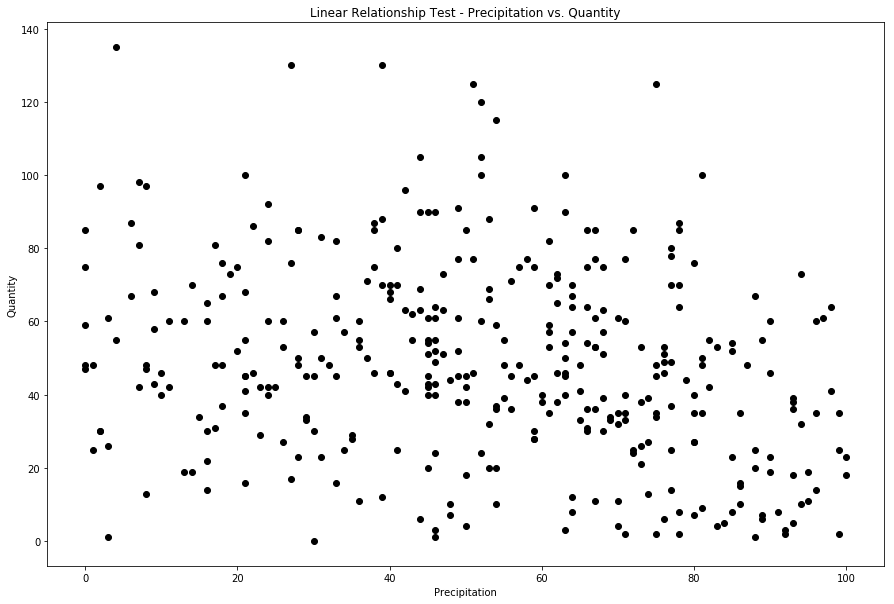

In [32]:
fig = plt.figure(figsize=(15,10))

x = data[["Precipitation"]]
y = data[["Quantity"]]

plt.xlabel('Precipitation')
plt.ylabel('Quantity')
plt.title('Linear Relationship Test - Precipitation vs. Quantity')
plt.plot(x, y, 'o', color='black');
plt.show()

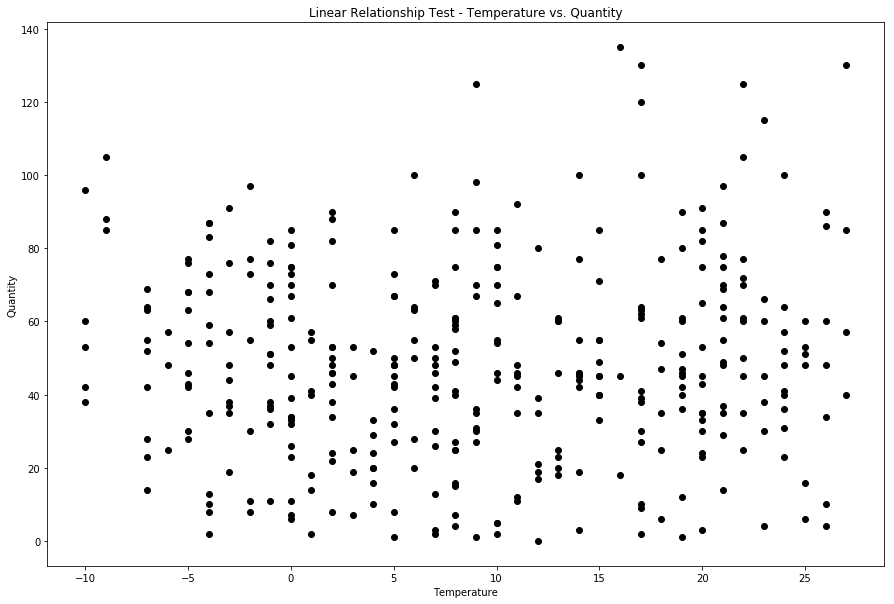

In [33]:
fig = plt.figure(figsize=(15,10))

x = data[["Temperature"]]
y = data[["Quantity"]]

plt.xlabel('Temperature')
plt.ylabel('Quantity')
plt.title('Linear Relationship Test - Temperature vs. Quantity')
plt.plot(x, y, 'o', color='black');
plt.show()

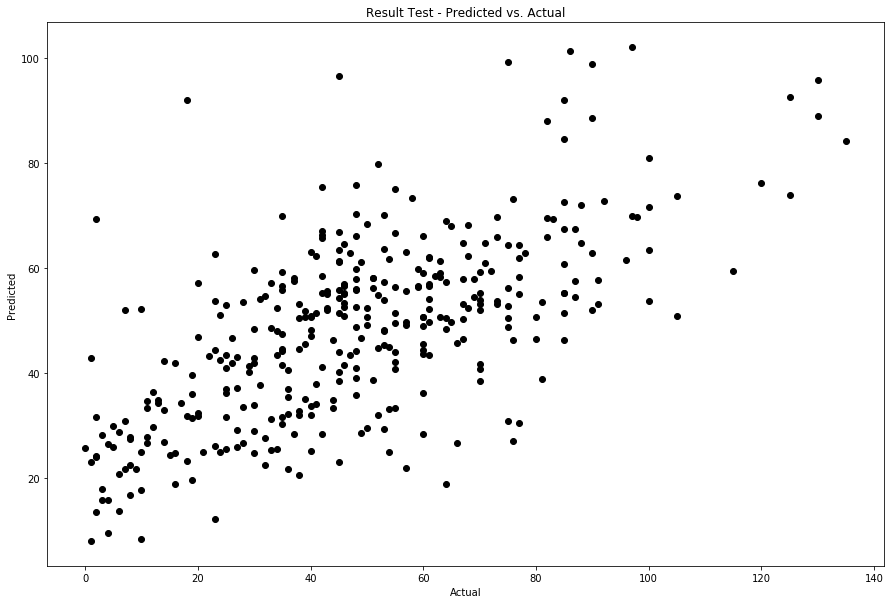

In [34]:
fig = plt.figure(figsize=(15,10))

y = pd.DataFrame(predictions)
x = data[["Quantity"]]

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Result Test - Predicted vs. Actual')
plt.plot(x, y, 'o', color='black');
plt.show()

In [80]:
pd.DataFrame(predictions).to_csv('predicted.csv')

###### Test of assumption 2 - the residuals of the regression should be normally distributed

In [35]:
Predicted_value = pd.DataFrame(predictions)
Predicted_value.columns = ['Predicted']

data1 = pd.concat([Predicted_value[['Predicted']], data[["Quantity"]].reset_index(drop=True)], axis=1)
data1['Error'] = data1['Predicted'] - data1['Quantity']
data1.head()

,Predicted,Quantity,Error
0,46.366882,76,-29.633118
1,48.193017,53,-4.806983
2,53.666134,73,-19.333866
3,53.895659,70,-16.104341
4,52.004902,7,45.004902


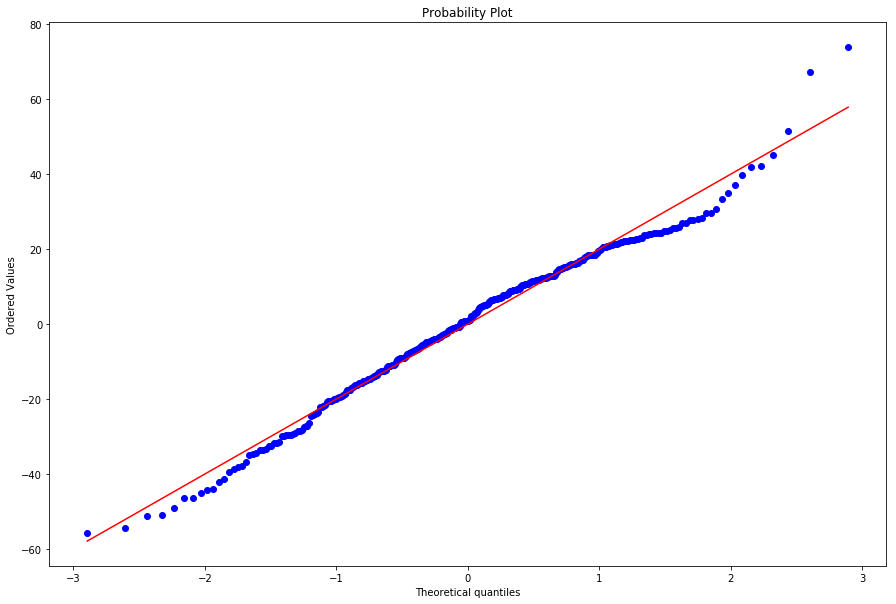

In [36]:
fig = plt.figure(figsize=(15,10))
stats.probplot(data1.Error, dist="norm", plot=pylab)
pylab.show()

###### Test of assumption 3 - no multicollinearity in the data

Variance inflation factor (VIF): a measure of multicollinearity. The VIF indicates whether a predictor has a strong linear relationship with the other predictor(s). 

Myers (1990) suggests that a value of 10 is a good value at which to worry. Bowerman and O’Connell (1990) suggest that if the average VIF is greater than 1, then multicollinearity may be biasing the regression model.

https://www.listendata.com/2018/01/linear-regression-in-python.html

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_train = data[['Temperature','Festival','Price','Weekday','London','Waterloo','Toronto']]

[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]

[2.0856191455034296,
 1.2385836865045061,
 4.9286829855732588,
 2.289940897485665,
 1.8441855897521557,
 1.6892299491828939,
 1.8534701821615451]

###### Test of assumption 4 - Homoscedasticity

Use a scatterplot of residuals versus predicted values to check for homoscedasticity

In [38]:
data1.head()

,Predicted,Quantity,Error
0,46.366882,76,-29.633118
1,48.193017,53,-4.806983
2,53.666134,73,-19.333866
3,53.895659,70,-16.104341
4,52.004902,7,45.004902


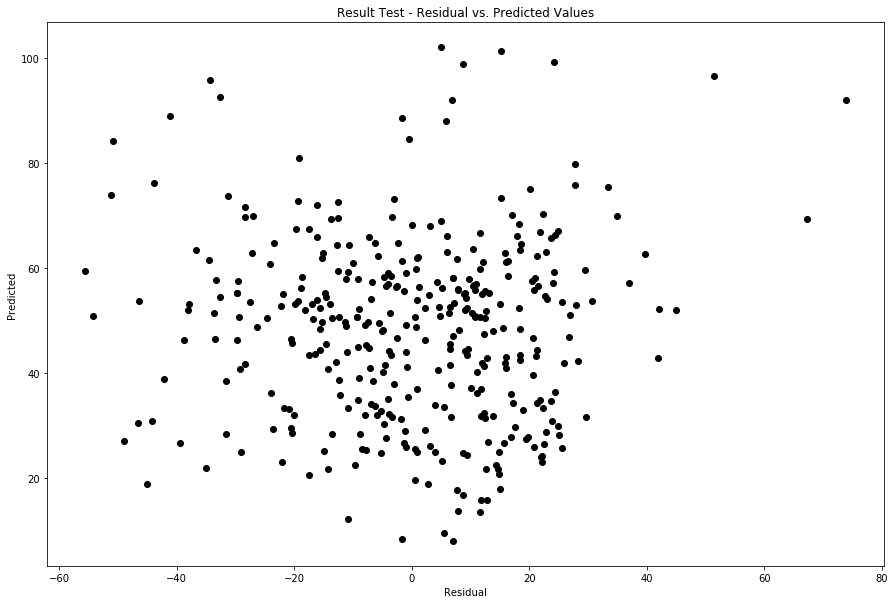

In [39]:
fig = plt.figure(figsize=(15,10))

x = data1[['Error']]
y = data1[['Predicted']]

plt.xlabel('Residual')
plt.ylabel('Predicted')
plt.title('Result Test - Residual vs. Predicted Values')
plt.plot(x, y, 'o', color='black');
plt.show()


# no clear pattern in the distribution, good

### Conclusion - 
#### Output Model: 

Quantity = 48.3781 - 7.0929 * precipitation - 2.5596 * Temperature + 10.9691 * Festival - 2.7815 * Price -3.6552 * Weekday + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto

Profit = Quantity *(price - material_cost) - parking - gas

# Optimization - 

Fixed cost is ignored since constant; Toronto = 1 with all other city parameters = 0;

Profit = Quantity * (price - material_cost)

Profit = (48.3781 - 7.0929 * precipitation - 2.5596 * Temperature + 10.9691 * Festival - 2.7815 * Price -3.6552 * Weekday + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto)     *    [Price - 4.6*Toronto - 2.54*Waterloo - 2.3*London - 3.92 *(1-London-Waterloo-Toronto)] 


###### Assuming precipitation, Temperature, Festival, Weekday are constants at first derivative (not affecting profit quad); so ignore

Profit = (constant - 2.7815 * Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto)     *    [Price - 0.68*Toronto + 1.38*Waterloo + 1.62*London -3.92]


###### Effect of price at certain city - 
Profit = (constant - 2.7815 * Price) * Price

### Sample example - substitute with all non-price parameters with median value

In [40]:
pd.DataFrame([X_scaled.median()])

,Precipitation,Temperature,Festival,Price,Weekday,London,Waterloo,Toronto
0,0.0342,-0.109373,-0.304655,0.019091,0.863951,-0.601615,-0.5,-0.588951


Profit = (48.3781 - 7.0929 * 0.0342 - 2.5596 * -0.109373 + 10.9691 * -0.304655 - 2.7815 * Price -3.6552 * 0.863951 + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto)     *    [Price - 4.6*Toronto - 2.54*Waterloo - 2.3*London - 3.92 *(1-London-Waterloo-Toronto)] 

Hence, 

    Profit = (41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto) [Price - 0.68Toronto + 1.38Waterloo + 1.62London - 3.92]


    Quantity = 41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto

##### Toronto (Toronto = 1, all other city parameter = 0)

Profit = (51.8731690951 - 2.7815 Price) (Price -4.6)

Profit = - 238.62 + 64.7* Price - 2.7815 Price ** 2 

In [65]:
# TRAIN as price, should be integer above 3 just considering material cost

def Plot_profit (a,b,c,d):
    zero_data = np.zeros(shape=(len(range(5,15)),3))
    result = pd.DataFrame(zero_data,columns=['Price','Quantity','Profit'])

    for i in range(5,15):
        row = (i-5)
        result['Price'][row] = i
        result['Quantity'][row] = 41.9157690951 - 2.7815 * i + d
        result['Profit'][row] = a + b* i +c * (i ** 2)

        
    print('Price at max profit is $',result.loc[result['Profit'].idxmax()][0],', giving a max daily profit at $', round(result.loc[result['Profit'].idxmax()][2],1))
    print('Quantity sold at this point is ', int(result.loc[result['Profit'].idxmax()][1]))
          
    
    fig = plt.figure(figsize=(15,10))

    plt.xlabel('Price')
    plt.ylabel('Profit')
    plt.title('Profit curve - impacted by price')
    plt.plot(result['Price'], result['Profit'], linestyle='-.', color='black');
    plt.show()

Price at max profit is $ 12.0 , giving a max daily profit at $ 137.2
Quantity sold at this point is  18


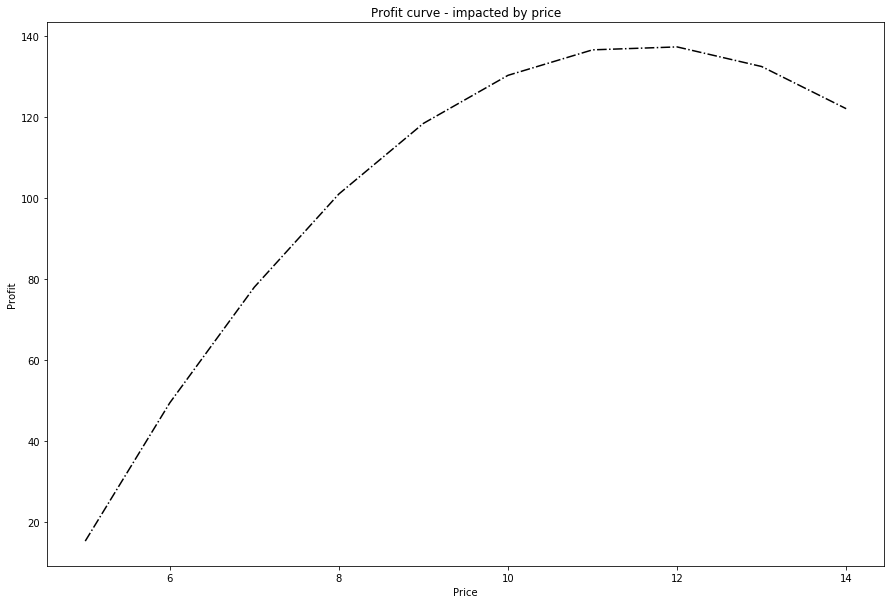

In [42]:
Plot_profit(- 238.62, 64.7, - 2.7815, 9.9574)

#####  London ( London = 1, all other city parameter = 0)

    Profit = (41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto) [Price - 0.68Toronto + 1.38Waterloo + 1.62London - 3.92]


    Quantity = 41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto


Hence, 

    Profit = (49.2 - 2.7815 Price)* (Price - 2.3)

    Profit = -113.16 + 55.59745 * Price - 2.7815 Price ** 2

Price at max profit is $ 10.0 , giving a max daily profit at $ 164.7
Quantity sold at this point is  21


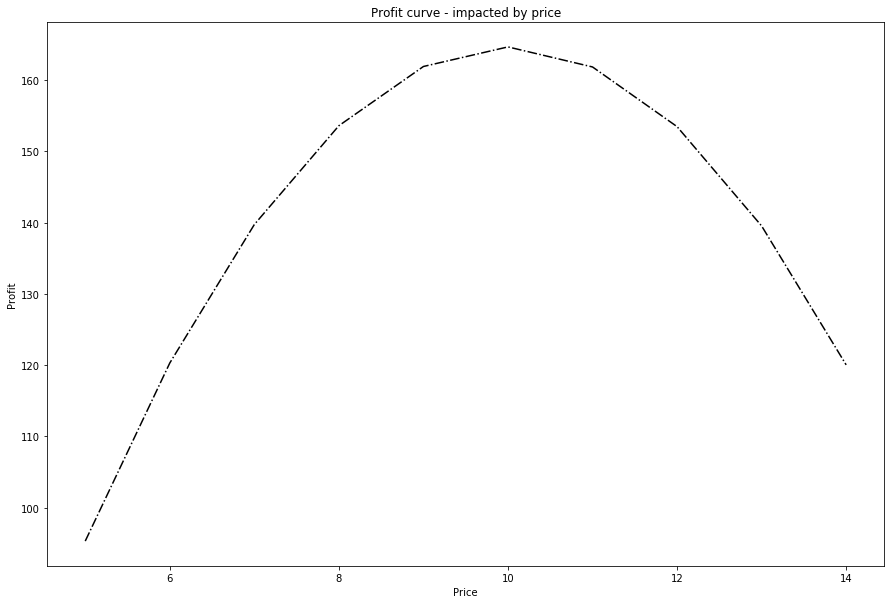

In [43]:
Plot_profit(-113.16, 55.59745, - 2.7815, 7.2900)

#####  Waterloo ( Waterloo = 1, all other city parameter = 0)

    Profit = (41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto) [Price - 0.68Toronto + 1.38Waterloo + 1.62London - 3.92]


    Quantity = 41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto


Hence, 

    Profit = (38.3 - 2.7815 Price)* (Price - 2.54)

    Profit = -97.282 + 45.4 * Price - 2.7815 Price ** 2

Price at max profit is $ 8.0 , giving a max daily profit at $ 87.9
Quantity sold at this point is  16


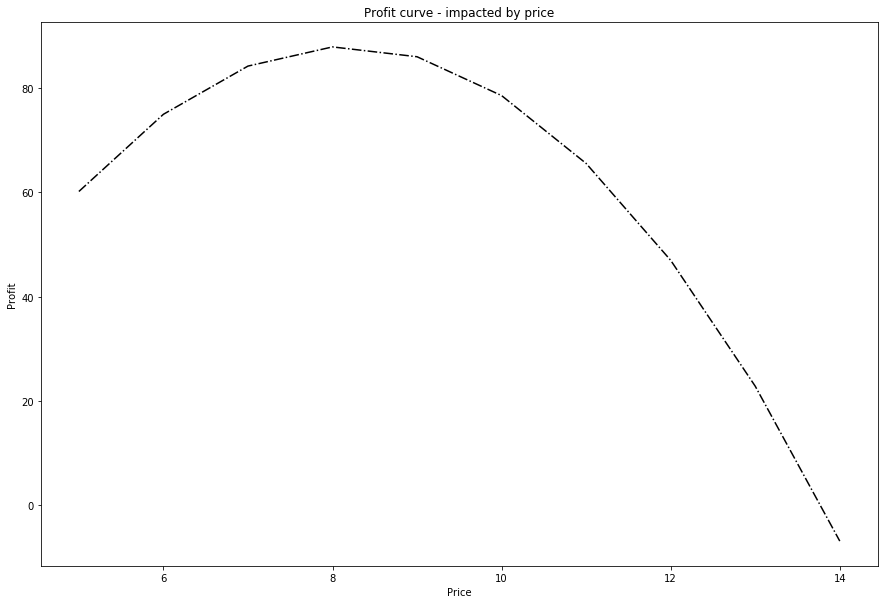

In [44]:
Plot_profit(-97.282, 45.4, - 2.7815, -3.6614)

#####  Hamilton ( all city parameter = 0)


    Profit = (41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto) [Price - 0.68Toronto + 1.38Waterloo + 1.62London - 3.92]


    Quantity = 41.9157690951 - 2.7815 Price + 7.2900 * London -3.6614 * Waterloo + 9.9574 * Toronto


Hence, 

    Profit = (41.9 - 2.7815 Price)* (Price - 3.92)

    Profit = -164.248 + 52.8 * Price - 2.7815 Price ** 2

Price at max profit is $ 9.0 , giving a max daily profit at $ 85.7
Quantity sold at this point is  16


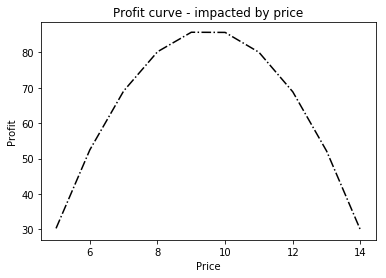

In [66]:
Plot_profit(-164.2, 52.8, - 2.7815, 0)

# Appendix 

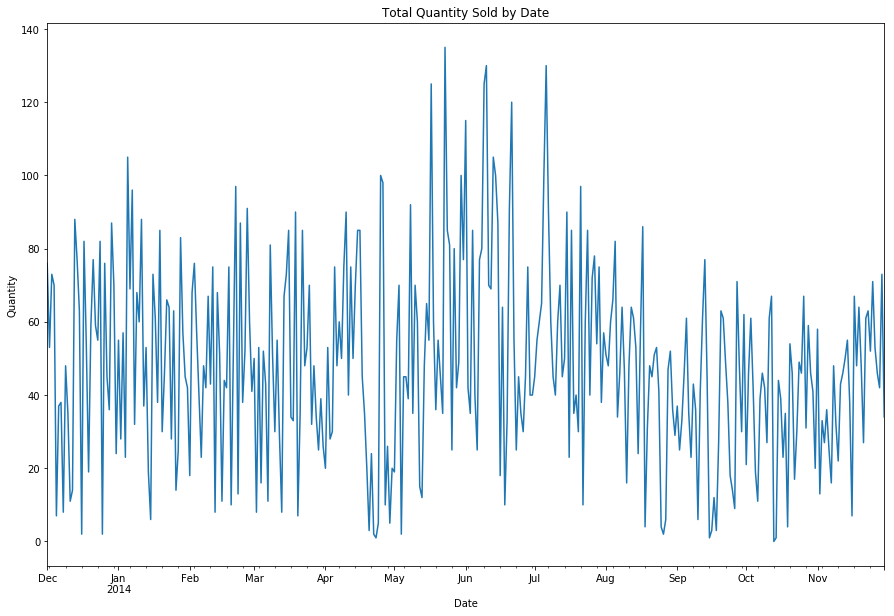

In [46]:
# Seasonality Effect
fig = plt.figure(figsize=(15,10))
series = Series.from_csv('Food_truck.csv', header=0)
series.plot()
plt.ylabel('Quantity')
plt.title('Total Quantity Sold by Date')
plt.show()

# Quick observation: high sales during summer; low sales between September and November 
## Might not be related with seasons... 

In [47]:
# # Seasonality Effect TEST - Hamilton

# fig = plt.figure(figsize=(15,10))
# series = Hamilton_data.Quantity
# series.plot()
# plt.ylabel('Quantity')
# plt.title('Total Quantity Sold by Date - Hamilton')
# plt.show()

In [48]:
# original dataset is used here 
## Visualizing pairwise relationships in the dataset as the first step before exploring data relationship
### data sdistribution and correlation can be seen in the figure. 
##### Here: explore the relationship between nuermical data within original dataset

# sns.pairplot(London_data)
# plt.show()

In [49]:
# X = data[['Precipitation','Festival','Price','London','Toronto']]
# y = data[["Quantity"]]

# # X = sm.add_constant(X)

# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

### Linear Regression

In [50]:
# from sklearn import linear_model

# lm = linear_model.LinearRegression()
# model = lm.fit(X,y)

In [51]:
# lm.score(X,y)

In [52]:
# lm.coef_

In [53]:
# lm.intercept_